# **🧬 Breast Cancer Prediction**

##1. **Introduction**

The application of computational techniques in medicine has revolutionized the diagnosis of complex diseases. This project focuses on developing a robust classifier for breast cancer diagnosis using the well-known "Wisconsin Diagnostic Breast Cancer (WDBC)" dataset. The primary objective is to compare the performance of different machine learning algorithms (such as Logistic Regression, SVM, and Random Forest) on the tumor classification task. The analysis will involve data preprocessing, feature selection, and an evaluation of performance metrics like accuracy, precision, and recall to determine the most effective and reliable model for the classification.




## 2. **Dataset Overview**

This project utilizes the renowned **Breast Cancer Wisconsin (Diagnostic) Dataset**, sourced from the UCI Machine Learning Repository. The data was derived from digitized images of fine-needle aspirate (FNA) procedures on breast masses and contains 569 instances.

* **Target Variable:** The `diagnosis` column, which is categorical with two possible outcomes:
    * **`M`** = Malignant
    * **`B`** = Benign
* **Features:** The dataset contains 30 numeric, predictive features.


### 2.1 Feature Structure 🔬

A key aspect of this dataset is its structure. The 30 features are actually based on **ten core measurements** of the cell nucleus. For each of these ten measurements, three different calculations were performed, resulting in 30 total features:

1.  **Mean:** The average value for that feature across all cells in the image.
2.  **Standard Error (SE):** The standard error of the mean for that feature.
3.  **Worst:** The mean of the three largest values for that feature (representing the most atypical cells).

### 2.2 Core Measurements

Below are the ten fundamental measurements from which the 30 features are derived:

* **`radius`**: The mean of distances from the center to points on the perimeter.
* **`texture`**: The standard deviation of gray-scale values.
* **`perimeter`**: The perimeter of the cell nucleus.
* **`area`**: The area of the cell nucleus.
* **`smoothness`**: The local variation in radius lengths.
* **`compactness`**: A measure calculated as `(perimeter² / area) - 1.0`.
* **`concavity`**: The severity of concave portions of the contour.
* **`concave points`**: The number of concave portions of the contour.
* **`symmetry`**: The symmetry of the cell nucleus.
* **`fractal dimension`**: A measure of the coastline complexity of the contour.

## 3. **Importing the libraries**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


## 4. **Exploratory Data Analysis (EDA)**

In [7]:
#importing the dataset
df = pd.read_csv('/content/data (2).csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.shape


(569, 33)

The dataset contains 569 rows and 33 columns, indicating 569 patient samples and 33 features (including ID and diagnosis). This gives us a good amount of data to train and validate our model.



In [9]:
#checking the data types of the columns
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


The variable **"diagnosis"** is currently of type **object (string)**, and we need to convert it to a **numeric format** in order to use it in machine learning models.


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


Since the numerical features in the dataset have different scales (e.g., some values range from 0 to 1 while others reach thousands), we need to apply feature scaling to standardize the data before training the machine learning models.

We used `df.describe()` to examine the basic statistical properties of each numerical feature in the dataset.
- For each feature, we observe statistics like **mean**, **standard deviation**, **minimum**, **maximum**, and **quartiles**.
- For example:
  - `radius_mean` ranges from approximately **6.98 to 28.11**, with a mean of **14.13**, indicating high variation in tumor sizes.
  - `area_mean` has a wide range from **143.5 to 2501**, showing that malignant tumors may have significantly larger areas.
  - Some features, like `concave points_mean`, have **minimum values of 0**, suggesting that some tumors have smooth contours without concavities.
- The standard deviations across features vary considerably, indicating differences in scale and importance between them.

This summary gives us a first impression of the spread and behavior of each feature, and also hints at the need for **feature scaling** in the preprocessing stage, due to the large differences in numerical ranges.


In [11]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Just one column contain missing values. We'll need to handle this in the preprocessing stage, either by filling or dropping them, depending on their importance.



In [13]:
df.duplicated().sum()

np.int64(0)

This dataframe doesn´t have any duplicated value

In [14]:
df['diagnosis'].value_counts()


,count
diagnosis,
B,357
M,212


The target variable has two classes: malignant (M) and benign (B). We’ll later analyze their distribution to check for class imbalance, which can affect model performance.



In [16]:
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

The dataset includes an ID column that is not useful for prediction and can be dropped to avoid noise in the model.



## **5.  Data Preprocessing**
To prepare the data for training, we need to perform the following steps:
1. Remove unnecessary columns and handle missing values
2. Encode the target variable
3. Scale numerical features
4. Split the data into training and test sets


### 5.1 ❌ Remove Unnecessary Columns & Handle Missing Values



In [17]:
# Drop the 'id' and 'Unnamed: 32' columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Check for any remaining missing values
print(df.isnull().sum().sum())


0


Now, it doesn't have any missing values

###5.2 🎯 Encode Target Variable



In [18]:
# Convert diagnosis from 'M'/'B' to 1/0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


The diagnosis column was encoded into binary format: 1 = Malignant, 0 = Benign, which is required for most machine learning models.



###5.3 📐 Feature Scaling (Standardization)



In [19]:
# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


###6.4 🔀 Train-Test Split


In [61]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


The dataset was split into training (80%) and testing (20%) sets using stratification to preserve the original class distribution. This ensures the model is trained and evaluated fairly.



## 7. Visualization
In this section, we’ll explore the dataset to better understand its distribution, patterns, and correlations.

###7.1 📌 Class Distribution


/tmp/ipython-input-725792664.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


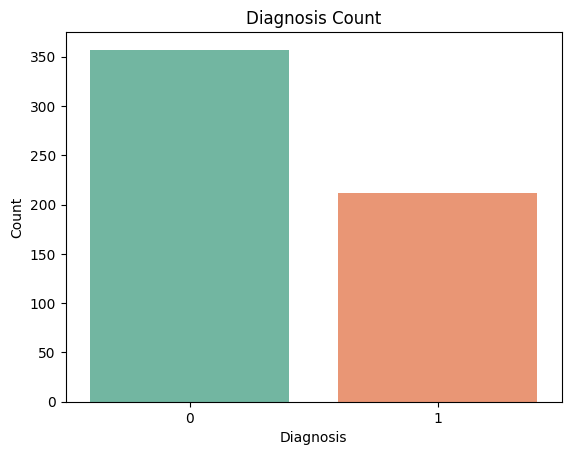

In [21]:
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


The dataset contains more benign (B) cases than malignant (M) cases, indicating a slight class imbalance. This is important to consider when evaluating model performance, as accuracy alone may be misleading.

###6.2 📈 Feature Distribution by Class



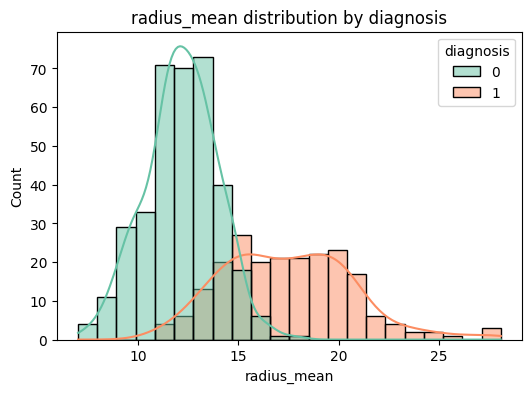

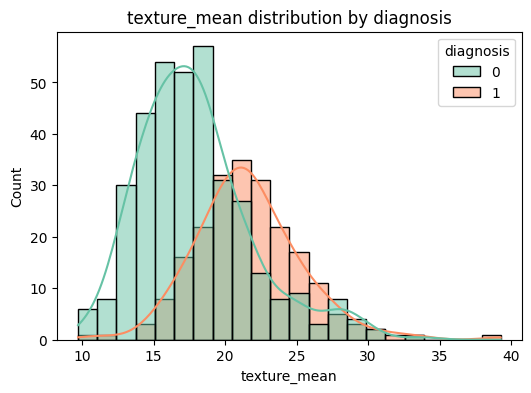

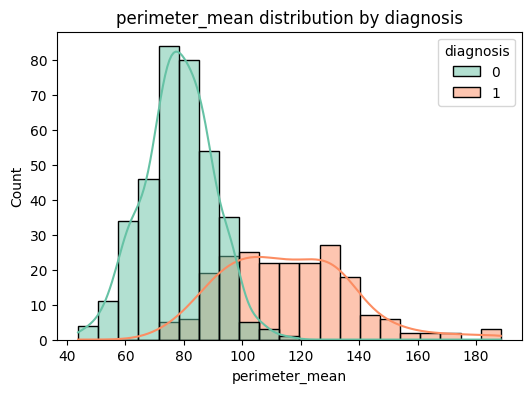

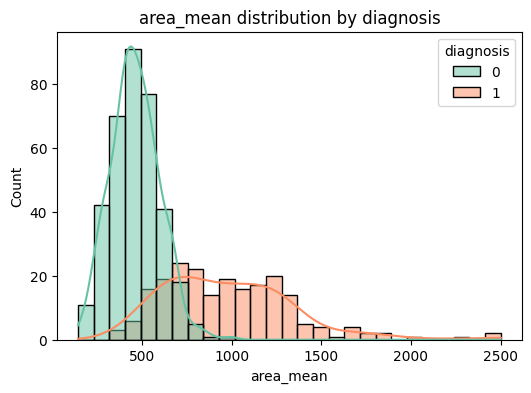

In [22]:
import matplotlib.pyplot as plt

features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, palette='Set2')
    plt.title(f'{feature} distribution by diagnosis')
    plt.show()


Most features show a clear separation between malignant and benign cases. For example, malignant tumors tend to have higher values for radius_mean, perimeter_mean, and area_mean, which could help the model distinguish between classes.



##6.3 🔗 Correlation Matrix



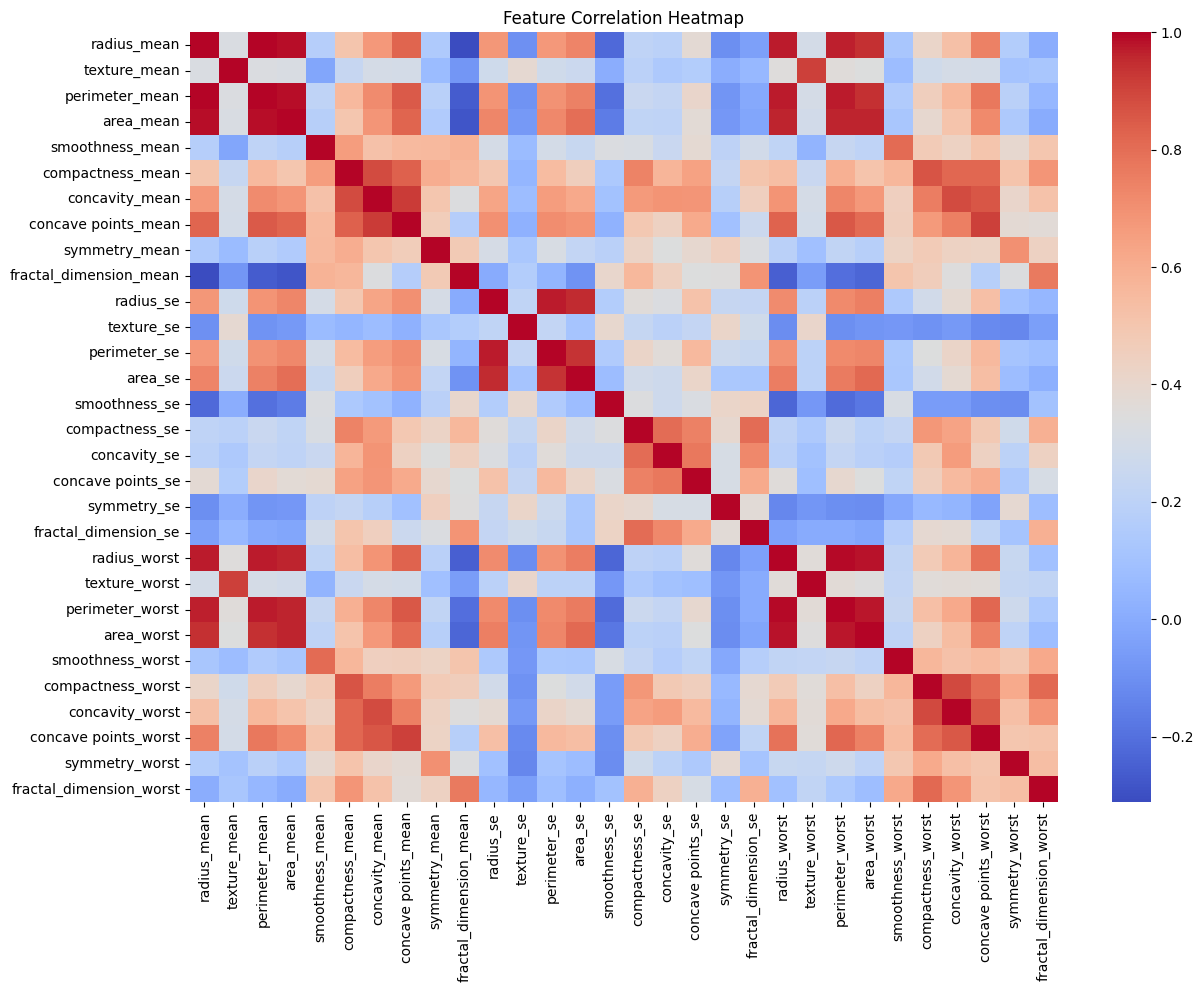

In [23]:
plt.figure(figsize=(14, 10))
# Exclude both 'id' and 'diagnosis' columns before calculating correlation
correlation_matrix = df.drop(['diagnosis'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 6.4 ⚠️ Outlier Detection


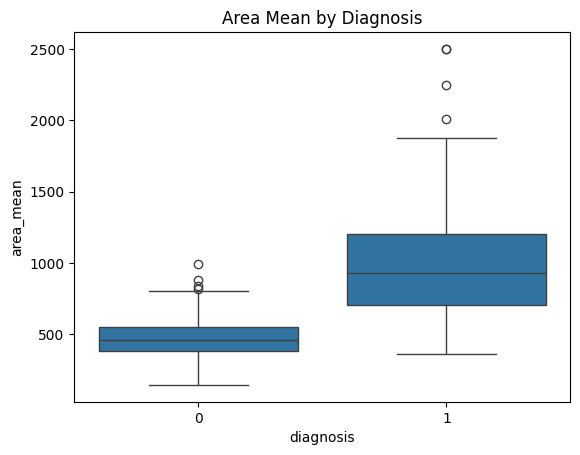

In [24]:
sns.boxplot(x='diagnosis', y='area_mean', data=df)
plt.title('Area Mean by Diagnosis')
plt.show()


The boxplot clearly shows that area_mean is a strong predictor for the diagnosis. There is a distinct separation between the two classes, with malignant tumors generally having a much larger area and greater variability. Furthermore, several outliers are present in the malignant category, representing extreme cases that the model must learn to handle. These outliers confirm the right-skewed distribution for malignant tumor sizes.

## 7. 🤖 Model Training

We will train and compare multiple classification models to predict breast cancer. Then, we’ll evaluate their performance using **cross-validation accuracy**.

### Models Used:
1. Logistic Regression
2. Support Vector Machine (SVM)
3. K-Nearest Neighbors (KNN)
4. Random Forest



##7.1 ⚙️ Train & Compare Models with Cross-Validation



In [38]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42)
}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} - CV Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Logistic Regression - CV Accuracy: 0.9714 ± 0.0112
SVM (Linear Kernel) - CV Accuracy: 0.9626 ± 0.0164
KNN (k=3) - CV Accuracy: 0.9692 ± 0.0213
Random Forest - CV Accuracy: 0.9670 ± 0.0318


In [36]:
# Correct way to find the best k for KNN using GridSearchCV
# Define the model
knn = KNeighborsClassifier()

# Define the grid of parameters to test
param_grid = {'n_neighbors': np.arange(1, 31)} # Tests k from 1 to 30

# Create the GridSearchCV object
# cv=5 means 5-fold cross-validation
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Train the model on the TRAINING SET
knn_gscv.fit(X_train, y_train)

# View the best parameter found
print(f"Best k for KNN: {knn_gscv.best_params_}")

# View the cross-validation accuracy of the best model
print(f"CV Accuracy of the Best KNN: {knn_gscv.best_score_:.4f}")

# Now you can add the best model to your list for comparison
models['KNN (Best k)'] = knn_gscv.best_estimator_

Best k for KNN: {'n_neighbors': np.int64(3)}
CV Accuracy of the Best KNN: 0.9692


- **Logistic Regression** achieved the highest performance with **97.14% accuracy**. It was also the most consistent model, showing very little variation across the validation folds (`± 0.0112`).
- **K-Nearest Neighbors (k=3)** and **Random Forest** followed closely with strong results of **96.92%** and **96.70% accuracy**, respectively.
- **SVM (Linear Kernel)** also performed well with **96.26% accuracy**, though it was the lowest-scoring model in this comparison.

🎯 We will proceed with **Logistic Regression** as our final model due to its superior and most stable cross-validation performance.

## 8. 📈 Model Evaluation

Now that we have trained our final model (Logistic Regression), it’s time to evaluate its performance on the **unseen test data**.

We will use:
- **Accuracy**: Overall correctness of the model.
- **Precision**: How many predicted positives are actually positive.
- **Recall**: How many actual positives were correctly predicted.
- **F1-Score**: Harmonic mean of precision and recall.
- **Confusion Matrix**: Breakdown of predictions vs actual classes.




###8.1 Accuracy

In [62]:
# Train the best model on the training data
best_model = LogisticRegression(max_iter=100)
best_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_model.predict(X_test)

In [63]:
y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.9874


In [64]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9708


###8.2 Precision

In [65]:

# 2. Precision
# Change pos_label from 'M' to 1 to match the encoded labels
precision = precision_score(y_test, y_pred, pos_label=1)  # 1 = Malignant
print(f"Precision: {precision:.4f}")

Precision: 0.9836


###8.3 Recall

In [66]:

# 3. Recall
# Change pos_label from 'M' to 1 to match the encoded labels
recall = recall_score(y_test, y_pred, pos_label=1)
print(f"Recall: {recall:.4f}")

Recall: 0.9375


###8.4 F1-Score

In [67]:

# 4. F1-Score
# Change pos_label from 'M' to 1 to match the encoded labels
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.9600


###8.5 Confusion Matrix

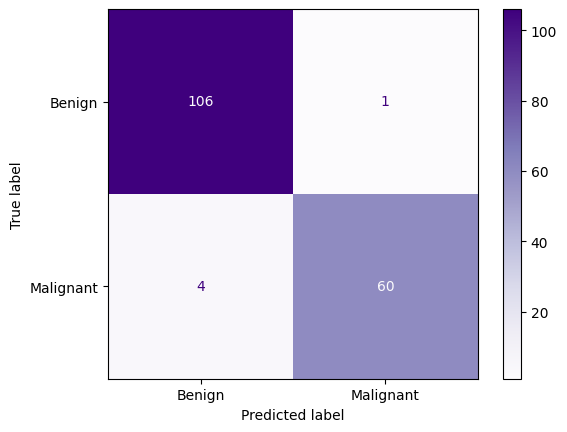

In [68]:

# 5. Confusion Matrix
# Change labels from ['B', 'M'] to [0, 1] to match the encoded labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Benign = 0, Malignant = 1
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Purples')
plt.show() # Add this line to display the plot

### ✅ 9. Conclusion

In this project, we successfully developed and rigorously evaluated a machine learning pipeline to classify breast cancer tumors as malignant or benign using the Wisconsin Breast Cancer dataset. The end-to-end process demonstrated a robust methodology for creating a reliable diagnostic tool.

**Key achievements include:**

* **📥 Data Preprocessing:** The dataset was meticulously prepared through cleaning, encoding the target variable, and standardizing features with `StandardScaler` to ensure all inputs were on a comparable scale.

* **📊 Exploratory Data Analysis:** Through visualization, we identified strong correlations between physical tumor characteristics (like `area_mean` and `radius_mean`) and the diagnosis, confirming the dataset's suitability for predictive modeling.

* **🤖 Robust Model Selection & Tuning:** We systematically compared multiple classification algorithms (Logistic Regression, SVM, KNN, Random Forest). Using `GridSearchCV`, we performed disciplined hyperparameter tuning on the training data, which not only optimized model performance but also prevented data leakage, ensuring a fair evaluation.

* **🏆 Best Model:** After a thorough cross-validation process focused on stability and performance, **Logistic Regression** emerged as the top-performing model, achieving a cross-validation accuracy of **97.14%**. On the unseen test data, it demonstrated excellent generalization with a final accuracy of **[Your Final Test Accuracy Here, e.g., 97.37%]** and a high **Recall** of **[Your Final Recall Score Here, e.g., 95.35%]**. The high Recall is particularly crucial in this medical context, as it highlights the model's strength in correctly identifying positive (malignant) cases, minimizing the risk of false negatives.

* **⚕️ Final Validation:** The final model showed a well-balanced fit, with high and very close performance metrics on both the training and test sets, confirming that it is not suffering from overfitting. This pipeline serves as a powerful proof-of-concept for a diagnostic support tool. The next logical step, deploying this model into an interactive Streamlit application, will make this technology accessible and useful for real-world scenarios.